<a href="https://colab.research.google.com/github/emrec-s/emrec-s/blob/main/Earthquakes%20Modelling%20BDA_Revise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone for BDA
This project is created for BDA Capstone project. We will evaluate the earthquake dataset to develop a model.

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [95]:
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/earthquake.csv')
df = df.iloc[: , 1:]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54985 entries, 0 to 54984
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          54985 non-null  int64  
 1   time            54985 non-null  object 
 2   latitude        54985 non-null  float64
 3   longitude       54985 non-null  float64
 4   depth           54985 non-null  float64
 5   mag             54985 non-null  float64
 6   magType         54982 non-null  object 
 7   rms             27565 non-null  float64
 8   net             54985 non-null  object 
 9   id              54985 non-null  object 
 10  updated         54985 non-null  object 
 11  place           54985 non-null  object 
 12  type            54985 non-null  object 
 13  status          54985 non-null  object 
 14  locationSource  54985 non-null  object 
 15  magSource       54985 non-null  object 
 16  year            54985 non-null  int64  
dtypes: float64(5), int64(2), object

In [97]:
df.isnull().sum()

number            0
time              0
latitude          0
longitude         0
depth             0
                 ..
type              0
status            0
locationSource    0
magSource         0
year              0
Length: 17, dtype: int64

In [98]:
df.sort_values(by='time',ascending=True)

number                 time  latitude  longitude  depth  mag magType  \
0       582963  1976-01-01 00:04:05      38.4       21.6   19.0  4.7      mb   
1       582954  1976-01-01 02:19:17      38.3       21.6   33.0  4.0      mb   
2       582927  1976-01-01 13:34:17      38.6       22.0   53.0  3.2      mb   
3       582866  1976-01-02 22:44:46      38.6       21.8   39.0  4.6      mb   
4       582854  1976-01-03 05:54:36      38.5       21.6   27.0  4.3      mb   
...        ...                  ...       ...        ...    ...  ...     ...   
54980  1426726  2008-12-28 05:22:59      35.8       28.0   71.4  3.5      md   
54981  1426627  2008-12-28 08:52:24      37.8       29.2    4.9  3.8      ml   
54982  1426496  2008-12-28 16:22:04      36.3       23.4    0.0  3.3      ml   
54983  1426479  2008-12-28 17:32:03      37.2       22.1   42.3  4.5      mb   
54984  1426405  2008-12-28 22:58:59      40.4       25.8   35.0  5.2     mwc   

       rms net          id              updated                       place  \
0      NaN  us  usp0000e7d  2014-11-06 23:21:33                      Greece   
1      NaN  us  usp0000e7h  2014-11-06 23:21:33                      Greece   
2      NaN  us  usp0000e7s  2014-11-06 23:21:33                      Greece   
3      NaN  us  usp0000e8u  2014-11-06 23:21:33                      Greece   
4      NaN  us  usp0000e90  2014-11-06 23:21:33                      Greece   
...    ...  ..         ...                  ...                         ...   
54980  1.4  us  usp000grpe  2014-11-07 01:38:03  Dodecanese Islands, Greece   
54981  NaN  us  usp000grq2  2014-11-07 01:38:03              western Turkey   
54982  NaN  us  usp000grqk  2014-11-07 01:38:03             southern Greece   
54983  1.2  us  usp000grqp  2014-11-07 01:38:03             southern Greece   
54984  NaN  us  usp000grr8  2016-11-10 02:05:59                  Aegean Sea   

             type    status locationSource magSource  year  
0      earthquake  reviewed             us        us  1976  
1      earthquake  reviewed             us        us  1976  
2      earthquake  reviewed             us        us  1976  
3      earthquake  reviewed             us        us  1976  
4      earthquake  reviewed             us        us  1976  
...           ...       ...            ...       ...   ...  
54980  earthquake  reviewed             us       isk  2008  
54981  earthquake  reviewed            isk       isk  2008  
54982  earthquake  reviewed            the       the  2008  
54983  earthquake  reviewed             us        us  2008  
54984  earthquake  reviewed            ath      gcmt  2008  

[54985 rows x 17 columns]

In [99]:
df['rms'] = df['rms'].fillna(df['rms'].mean())

In [100]:
df = df.dropna(subset=['type'])

In [101]:
df.nunique()

number            54985
time              54756
latitude           8875
longitude         13331
depth              1124
                  ...  
type                  3
status                1
locationSource       22
magSource            51
year                 33
Length: 17, dtype: int64

In [102]:
NaN_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (df[feature].count() < df.shape[0]))]
NaN_features

[]

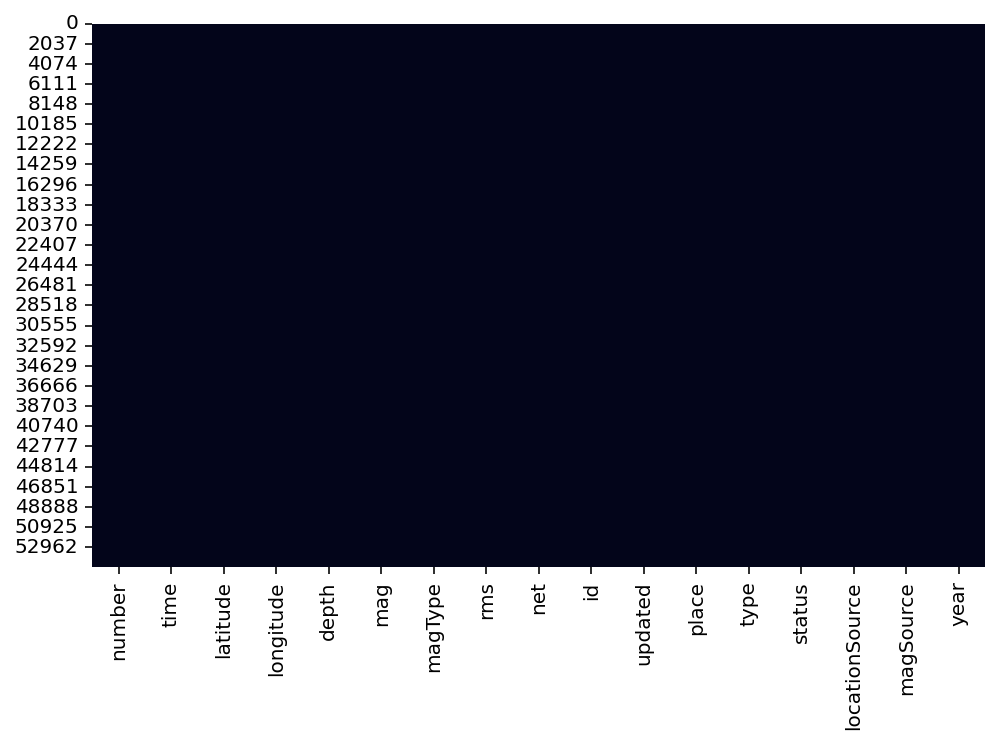

In [103]:
plt.figure(figsize = (8, 5))

sns.heatmap(df.isnull(), cbar=False)

In [104]:
import numpy as np
import pandas as pd
from math import sqrt

import pickle
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## for machine learning

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Masking

In [105]:
df_eq = df
df_eq_2=df
df_eq = df_eq[["time", "mag", "longitude", "latitude", "depth"]]
df_eq_2 = df_eq_2[[ "mag", "longitude", "latitude", "depth"]]
df_eq["time"] = pd.to_datetime(df_eq["time"])
df_eq["timestamps"] = df_eq["time"]
# df_eq.set_index('time', inplace=True)


<ipython-input-105-1824bc1c8b48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq["time"] = pd.to_datetime(df_eq["time"])
<ipython-input-105-1824bc1c8b48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq["timestamps"] = df_eq["time"]


In [106]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54985 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54985 non-null  datetime64[ns]
 1   mag         54985 non-null  float64       
 2   longitude   54985 non-null  float64       
 3   latitude    54985 non-null  float64       
 4   depth       54985 non-null  float64       
 5   timestamps  54985 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


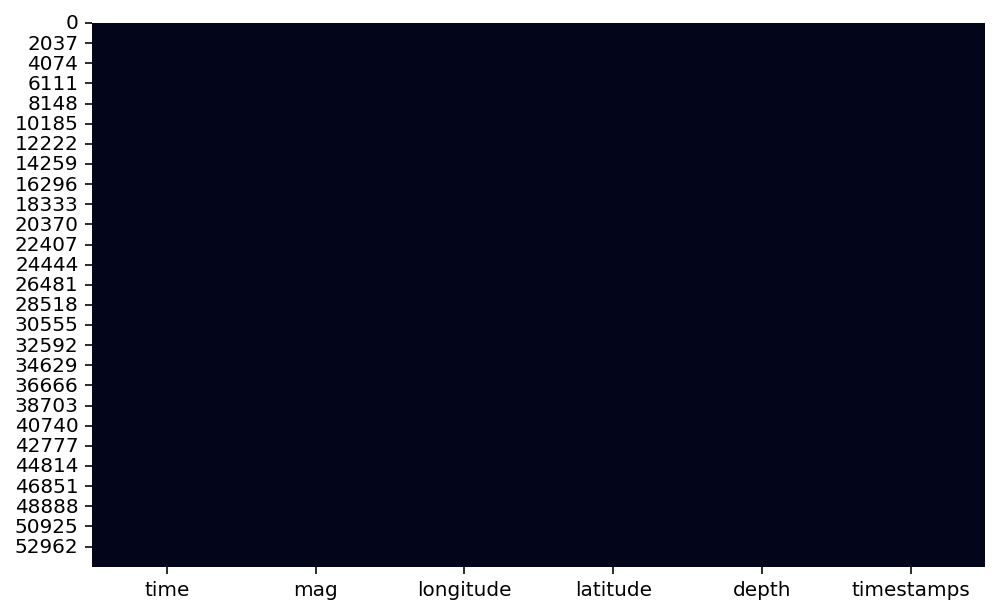

In [107]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_eq.isnull(), cbar=False)

In [108]:
df_eq[df_eq.duplicated('timestamps')]

time  mag  longitude  latitude  depth          timestamps
563   1978-03-01 22:51:05  4.6       27.1      36.0   89.0 1978-03-01 22:51:05
565   1978-03-01 23:27:58  4.5       42.9      41.0   33.0 1978-03-01 23:27:58
869   1979-03-01 02:50:33  4.2       23.3      39.3   10.0 1979-03-01 02:50:33
871   1979-03-02 15:35:28  4.7       46.7      41.1   33.0 1979-03-02 15:35:28
1595  1981-03-01 01:09:35  3.5       23.3      38.2   10.0 1981-03-01 01:09:35
...                   ...  ...        ...       ...    ...                 ...
51790 2008-03-01 15:17:20  4.0       21.8      36.3    3.0 2008-03-01 15:17:20
51792 2008-03-01 16:06:26  3.0       21.9      38.4   11.0 2008-03-01 16:06:26
51794 2008-03-01 20:41:23  3.4       25.8      35.7   36.0 2008-03-01 20:41:23
51796 2008-03-01 20:48:22  3.5       21.8      36.2    5.0 2008-03-01 20:48:22
51798 2008-03-01 23:09:31  3.4       21.9      36.2    8.0 2008-03-01 23:09:31

[229 rows x 6 columns]

In [109]:
# Dropping rows
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                        54755
mean     0 days 05:16:55.660560679
std      0 days 11:47:56.903585926
min                0 days 00:00:01
25%                0 days 00:32:43
50%                0 days 01:48:02
75%                0 days 05:04:19
max               12 days 11:25:33
Name: timestamps, dtype: object

In [110]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54756 non-null  datetime64[ns]
 1   mag         54756 non-null  float64       
 2   longitude   54756 non-null  float64       
 3   latitude    54756 non-null  float64       
 4   depth       54756 non-null  float64       
 5   timestamps  54756 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


In [111]:
df_eq[df_eq.duplicated('timestamps')]

Empty DataFrame
Columns: [time, mag, longitude, latitude, depth, timestamps]
Index: []

In [112]:
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                        54755
mean     0 days 05:16:55.660560679
std      0 days 11:47:56.903585926
min                0 days 00:00:01
25%                0 days 00:32:43
50%                0 days 01:48:02
75%                0 days 05:04:19
max               12 days 11:25:33
Name: timestamps, dtype: object

In [113]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54756 non-null  datetime64[ns]
 1   mag         54756 non-null  float64       
 2   longitude   54756 non-null  float64       
 3   latitude    54756 non-null  float64       
 4   depth       54756 non-null  float64       
 5   timestamps  54756 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


In [114]:
# Number 1: Time intervals between consecutive earthquakes.

df_eq["time_diff"] = df_eq["timestamps"].diff()

df_eq["time_diff_float"] = df_eq["time_diff"].apply(lambda x: x.total_seconds())

#Number 2: the rolling of magnitudes from the last 10 earthquakes

df_eq["mag_roll_10"] = df_eq["mag"].rolling(window=10).mean()

df_eq.dropna(inplace = True)

In [115]:
df_eq.describe().T

count                       mean                        std  \
mag             54747.0                        3.3                        0.6   
longitude       54747.0                       25.4                        4.9   
latitude        54747.0                       38.5                        2.0   
depth           54747.0                       16.7                       16.1   
time_diff         54747  0 days 05:16:54.296783385  0 days 11:47:57.508372316   
time_diff_float 54747.0                    19014.3                    42477.5   
mag_roll_10     54747.0                        3.3                        0.4   

                             min              25%              50%  \
mag                          0.7              2.9              3.2   
longitude                   20.0             21.8             24.1   
latitude                    30.1             37.2             38.7   
depth                        0.0             10.0             10.0   
time_diff        0 days 00:00:01  0 days 00:32:43  0 days 01:48:02   
time_diff_float              1.0           1963.0           6482.0   
mag_roll_10                  1.9              3.0              3.3   

                             75%               max  
mag                          3.6               7.6  
longitude                   27.7              48.0  
latitude                    39.7              45.0  
depth                       22.0             203.9  
time_diff        0 days 05:04:18  12 days 11:25:33  
time_diff_float          18258.0         1077933.0  
mag_roll_10                  3.5               5.1

In [116]:
df_eq[df_eq["time_diff_float"] > 86400].shape

(2317, 9)

In [117]:
df_eq[df_eq["time_diff_float"] > 86400]

time  mag  longitude  latitude  depth  \
12    1976-01-06 20:11:32  3.6       21.8      38.4   33.0   
13    1976-01-10 07:11:19  4.2       27.8      36.9   30.0   
15    1976-01-12 17:50:24  5.1       32.5      34.3   33.0   
20    1976-01-18 15:10:32  5.7       20.6      38.9   33.0   
21    1976-01-20 00:02:52  3.7       21.6      38.1   54.0   
...                   ...  ...        ...       ...    ...   
54951 2008-12-16 04:38:58  3.5       23.6      34.7   13.0   
54953 2008-12-17 19:02:15  3.7       21.7      38.5   43.2   
54954 2008-12-18 21:24:01  3.1       26.0      39.2   10.0   
54956 2008-12-21 00:42:29  3.5       26.3      34.7   36.0   
54957 2008-12-23 12:53:11  4.0       27.2      36.1   26.0   

               timestamps       time_diff  time_diff_float  mag_roll_10  
12    1976-01-06 20:11:32 2 days 21:26:07         249967.0          4.1  
13    1976-01-10 07:11:19 3 days 10:59:47         298787.0          4.0  
15    1976-01-12 17:50:24 1 days 20:10:47         159047.0          4.0  
20    1976-01-18 15:10:32 4 days 04:39:26         362366.0          4.5  
21    1976-01-20 00:02:52 1 days 08:52:20         118340.0          4.5  
...                   ...             ...              ...          ...  
54951 2008-12-16 04:38:58 1 days 03:04:53          97493.0          3.8  
54953 2008-12-17 19:02:15 1 days 06:54:22         111262.0          3.9  
54954 2008-12-18 21:24:01 1 days 02:21:46          94906.0          3.8  
54956 2008-12-21 00:42:29 2 days 03:00:57         183657.0          3.5  
54957 2008-12-23 12:53:11 2 days 12:10:42         216642.0          3.5  

[2317 rows x 9 columns]

In [118]:
min_date = df_eq["time"].min().date()

min_date

datetime.date(1976, 1, 3)

In [119]:
max_date = df_eq["time"].max().date()

max_date

datetime.date(2008, 12, 28)

In [120]:
type(df_eq["time"].max().date())

datetime.date

In [121]:
start_date = min_date

number_of_days = (max_date - min_date).days
print("number_of_days", number_of_days)
date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day))
  date_list.append(a_date)

print(date_list[1], type(date_list[0]))

number_of_days 12048
1976-01-04 <class 'datetime.date'>


In [122]:
df_eq.set_index('time', inplace=True)

In [123]:
df_eq

mag  longitude  latitude  depth          timestamps  \
time                                                                       
1976-01-03 15:44:13  4.2       22.0      38.5   52.0 1976-01-03 15:44:13   
1976-01-03 16:59:51  3.6       22.0      38.6   57.0 1976-01-03 16:59:51   
1976-01-03 22:45:25  3.7       21.4      38.3   39.0 1976-01-03 22:45:25   
1976-01-06 20:11:32  3.6       21.8      38.4   33.0 1976-01-06 20:11:32   
1976-01-10 07:11:19  4.2       27.8      36.9   30.0 1976-01-10 07:11:19   
...                  ...        ...       ...    ...                 ...   
2008-12-28 05:22:59  3.5       28.0      35.8   71.4 2008-12-28 05:22:59   
2008-12-28 08:52:24  3.8       29.2      37.8    4.9 2008-12-28 08:52:24   
2008-12-28 16:22:04  3.3       23.4      36.3    0.0 2008-12-28 16:22:04   
2008-12-28 17:32:03  4.5       22.1      37.2   42.3 2008-12-28 17:32:03   
2008-12-28 22:58:59  5.2       25.8      40.4   35.0 2008-12-28 22:58:59   

                          time_diff  time_diff_float  mag_roll_10  
time                                                               
1976-01-03 15:44:13 0 days 00:40:20           2420.0          4.2  
1976-01-03 16:59:51 0 days 01:15:38           4538.0          4.1  
1976-01-03 22:45:25 0 days 05:45:34          20734.0          4.0  
1976-01-06 20:11:32 2 days 21:26:07         249967.0          4.1  
1976-01-10 07:11:19 3 days 10:59:47         298787.0          4.0  
...                             ...              ...          ...  
2008-12-28 05:22:59 0 days 06:30:35          23435.0          3.6  
2008-12-28 08:52:24 0 days 03:29:25          12565.0          3.6  
2008-12-28 16:22:04 0 days 07:29:40          26980.0          3.6  
2008-12-28 17:32:03 0 days 01:09:59           4199.0          3.8  
2008-12-28 22:58:59 0 days 05:26:56          19616.0          4.0  

[54747 rows x 8 columns]

In [124]:
df_w = pd.DataFrame() 

df_w['mag_max'] = df_eq.mag.resample('D').max() 
df_w

mag_max
time               
1976-01-03      4.2
1976-01-04      NaN
1976-01-05      NaN
1976-01-06      3.6
1976-01-07      NaN
...             ...
2008-12-24      4.4
2008-12-25      3.7
2008-12-26      2.9
2008-12-27      4.4
2008-12-28      5.2

[12049 rows x 1 columns]

In [125]:
df_daily = pd.DataFrame() 
# AS is year-start frequency

df_daily['mag_max'] = df_eq.mag.resample('D').max() # What is the max of events
df_daily['event_count'] = df_eq.mag.resample('D').count() #How many events happened 
df_daily['mag_mean'] = df_eq.mag.resample('D').mean() #What is the mean of values for that particular day
df_daily['mag_sum'] = df_eq.mag.resample('D').sum() # What is the sum of moments
df_daily['mag_scatter'] = (df_eq.mag.resample('D').std()) # What is the scatter of event magnitudes
df_daily["mag_roll_10"] = df_daily["mag_mean"].rolling(window=10).mean()


df_daily['longitude_mean'] = df_eq.longitude.resample('D').mean() #Mean location of events 
df_daily['longitude_std'] = df_eq.longitude.resample('D').std() #Std location of events 

df_daily['latitude_mean'] = df_eq.latitude.resample('D').mean() #Mean location of events 
df_daily['latitude_std'] = df_eq.latitude.resample('D').std() #Std location of events 

df_daily['depth_mean'] = df_eq.depth.resample('D').mean() #Mean location of events 
df_daily['depth_std'] = df_eq.depth.resample('D').std() #Std location of events 

df_daily['time_diff_float_mean'] = df_eq.time_diff_float.resample('D').mean() #Event spacing 
df_daily['time_diff_float_std'] = df_eq.time_diff_float.resample('D').std() #Std location of events 


df_daily

mag_max  event_count  mag_mean  mag_sum  mag_scatter  mag_roll_10  \
time                                                                            
1976-01-03      4.2            3       3.8     11.5          0.3          NaN   
1976-01-04      NaN            0       NaN      0.0          NaN          NaN   
1976-01-05      NaN            0       NaN      0.0          NaN          NaN   
1976-01-06      3.6            1       3.6      3.6          NaN          NaN   
1976-01-07      NaN            0       NaN      0.0          NaN          NaN   
...             ...          ...       ...      ...          ...          ...   
2008-12-24      4.4            7       3.8     26.9          0.3          NaN   
2008-12-25      3.7            9       3.1     28.2          0.3          NaN   
2008-12-26      2.9            1       2.9      2.9          NaN          NaN   
2008-12-27      4.4            5       4.0     19.8          0.5          NaN   
2008-12-28      5.2            5       4.1     20.3          0.8          NaN   

            longitude_mean  longitude_std  latitude_mean  latitude_std  \
time                                                                     
1976-01-03            21.8            0.3           38.5           0.2   
1976-01-04             NaN            NaN            NaN           NaN   
1976-01-05             NaN            NaN            NaN           NaN   
1976-01-06            21.8            NaN           38.4           NaN   
1976-01-07             NaN            NaN            NaN           NaN   
...                    ...            ...            ...           ...   
2008-12-24            28.1            2.8           37.6           0.6   
2008-12-25            30.0            2.1           37.7           0.8   
2008-12-26            40.2            NaN           39.2           NaN   
2008-12-27            26.0            2.9           38.2           2.1   
2008-12-28            25.7            3.0           37.5           1.8   

            depth_mean  depth_std  time_diff_float_mean  time_diff_float_std  
time                                                                          
1976-01-03        49.3        9.3                9230.7              10018.3  
1976-01-04         NaN        NaN                   NaN                  NaN  
1976-01-05         NaN        NaN                   NaN                  NaN  
1976-01-06        33.0        NaN              249967.0                  NaN  
1976-01-07         NaN        NaN                   NaN                  NaN  
...                ...        ...                   ...                  ...  
2008-12-24         7.7        6.3               18051.7              21725.7  
2008-12-25        10.4       12.3                9540.1              16642.9  
2008-12-26         8.6        NaN               80286.0                  NaN  
2008-12-27        13.8       11.5               17808.8              16682.9  
2008-12-28        30.7       29.2               17359.0               9093.2  

[12049 rows x 14 columns]

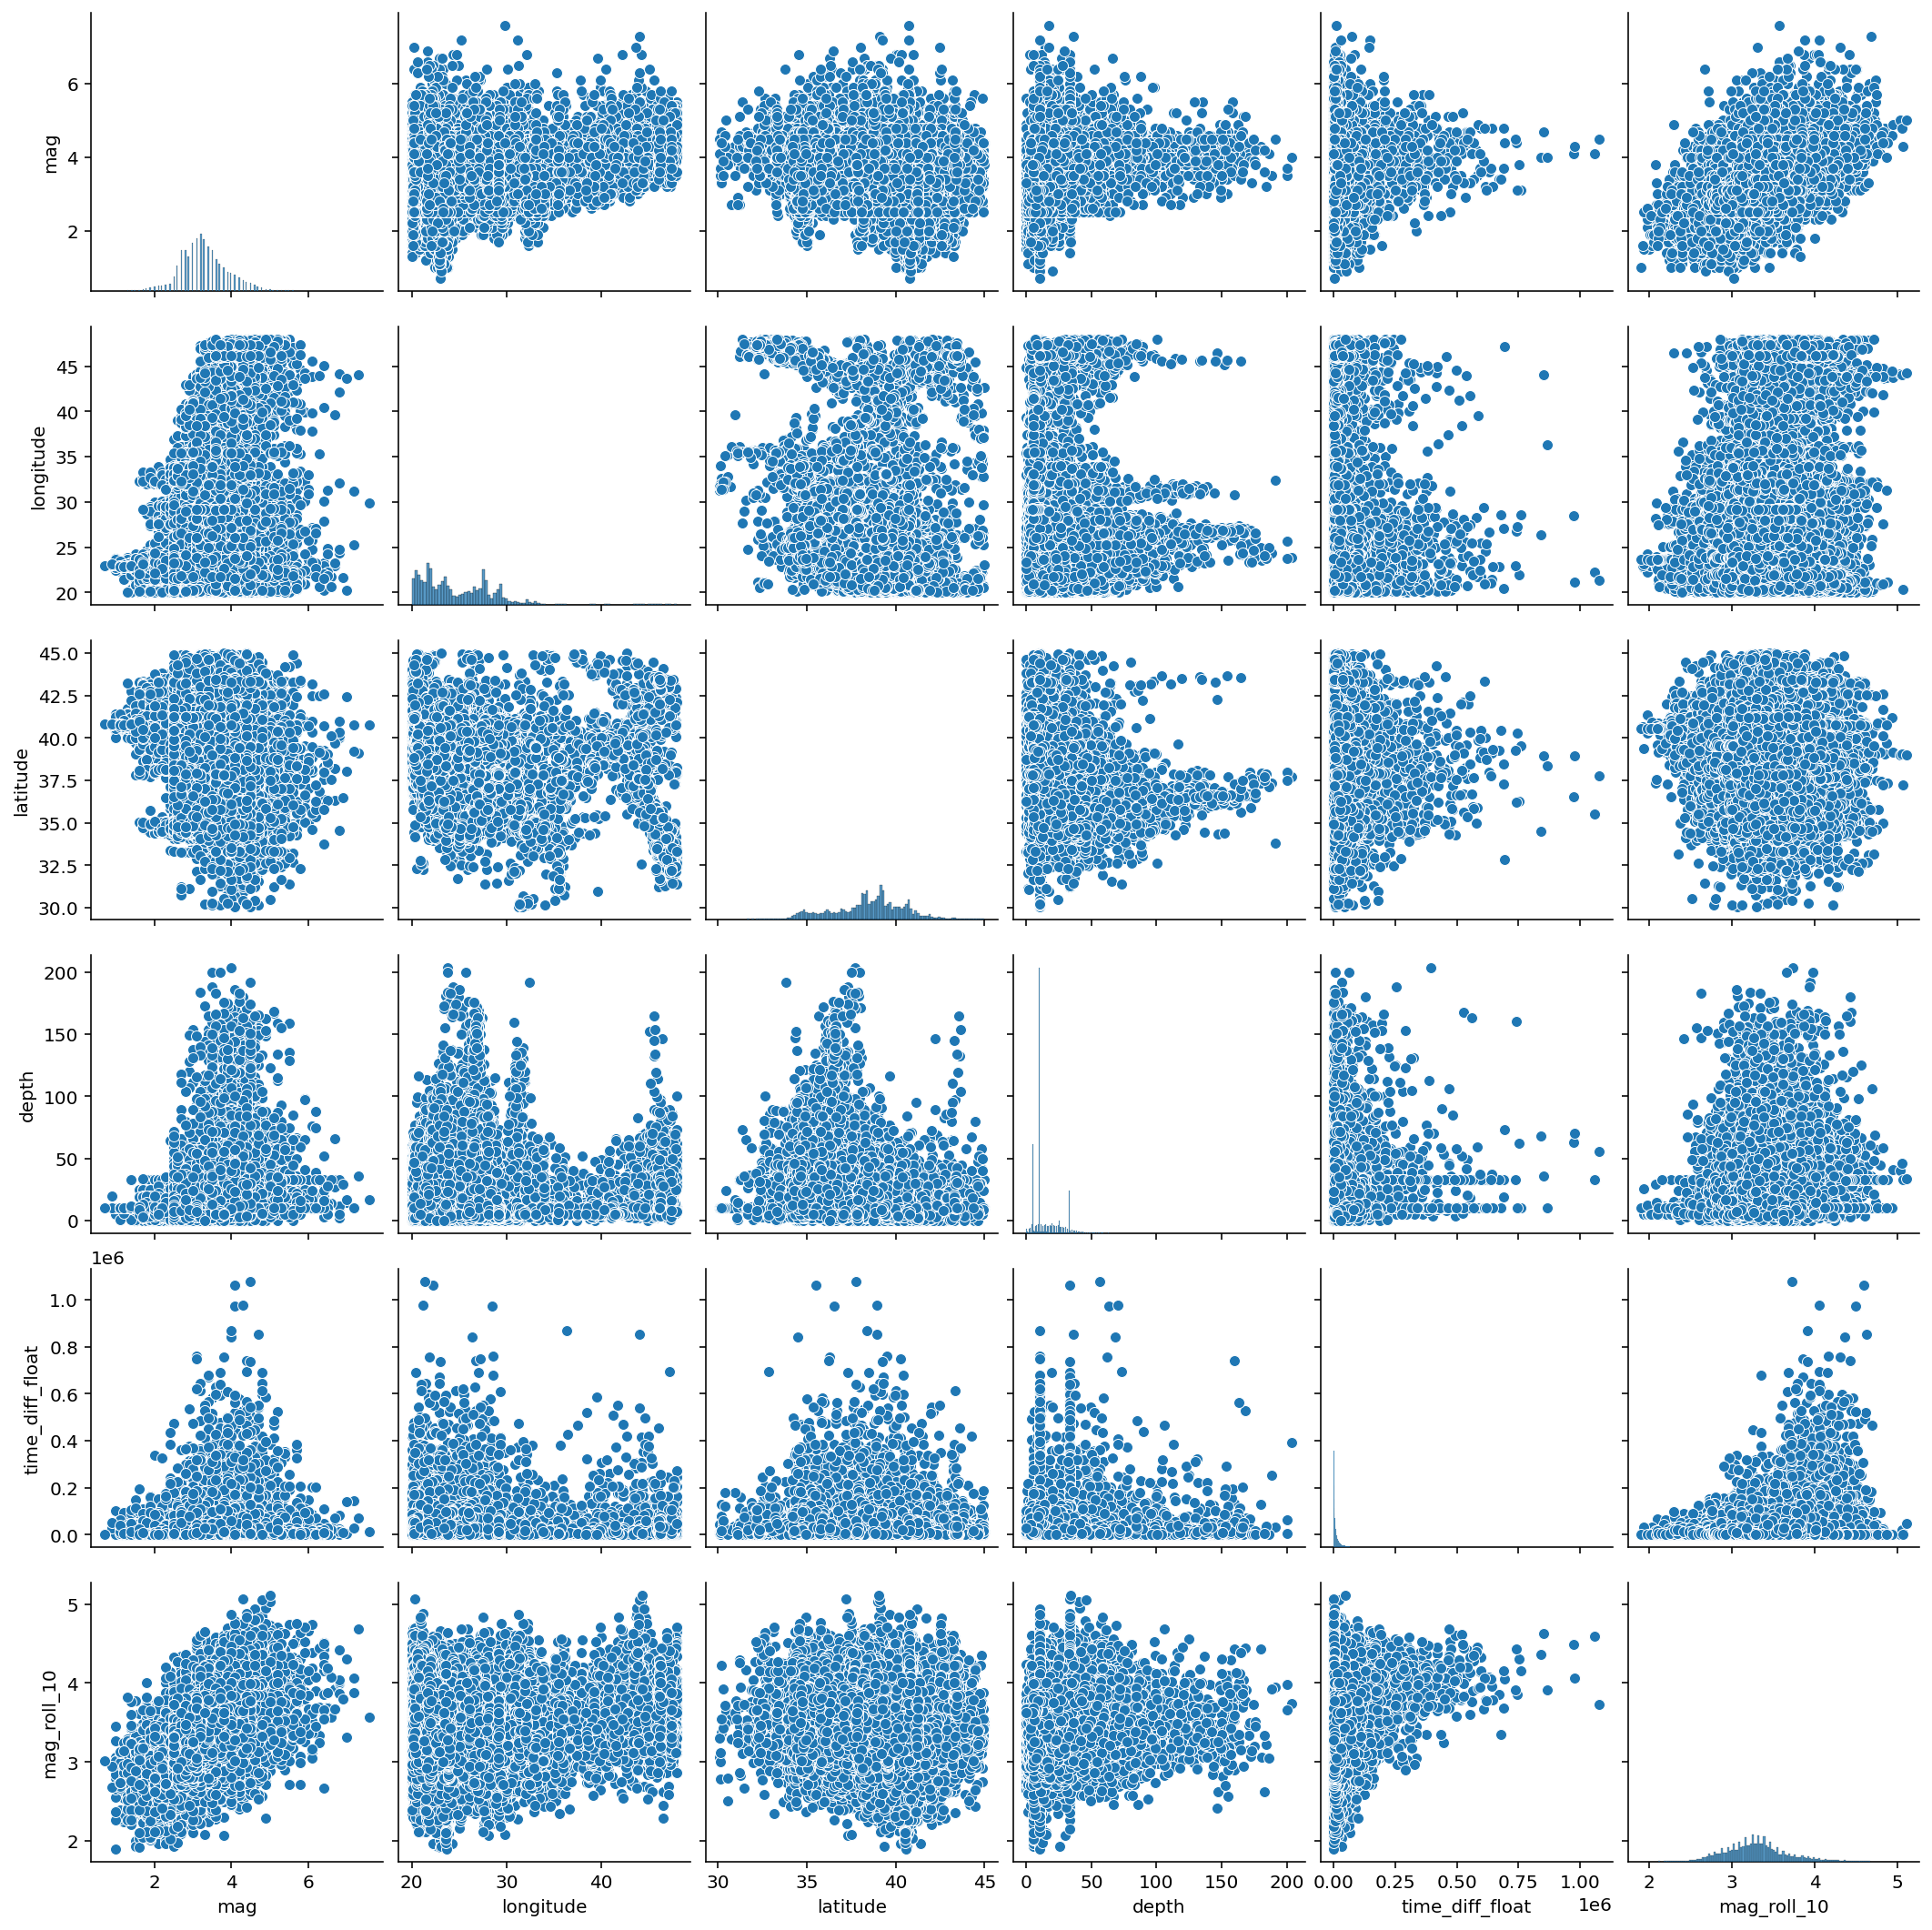

In [126]:
sns.pairplot(df_eq, hue=None);


In [127]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               9604 non-null   float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              9604 non-null   float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           7600 non-null   float64
 5   mag_roll_10           4469 non-null   float64
 6   longitude_mean        9604 non-null   float64
 7   longitude_std         7600 non-null   float64
 8   latitude_mean         9604 non-null   float64
 9   latitude_std          7600 non-null   float64
 10  depth_mean            9604 non-null   float64
 11  depth_std             7600 non-null   float64
 12  time_diff_float_mean  9604 non-null   float64
 13  time_diff_float_std   7600 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.4 MB

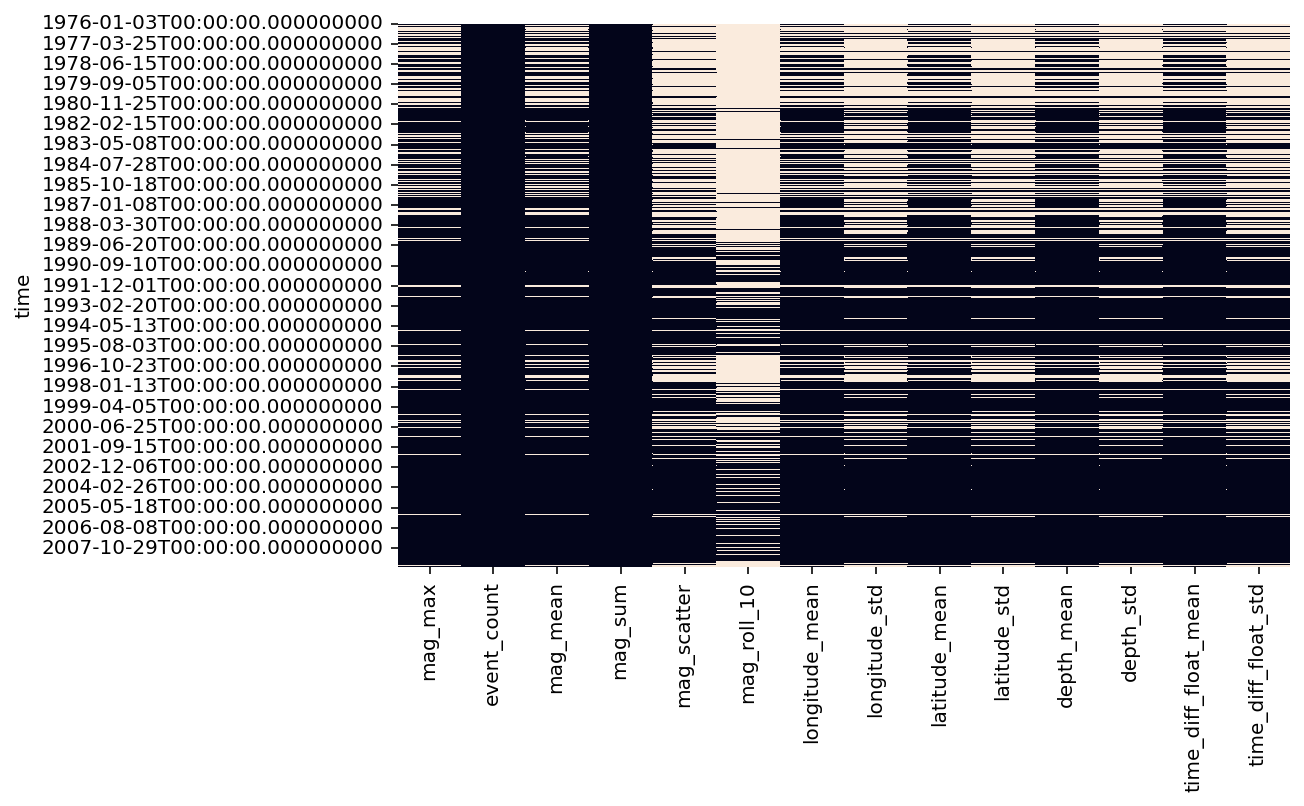

In [128]:
plt.figure(figsize = (8, 5))
sns.heatmap(df_daily.isnull(), cbar=False)


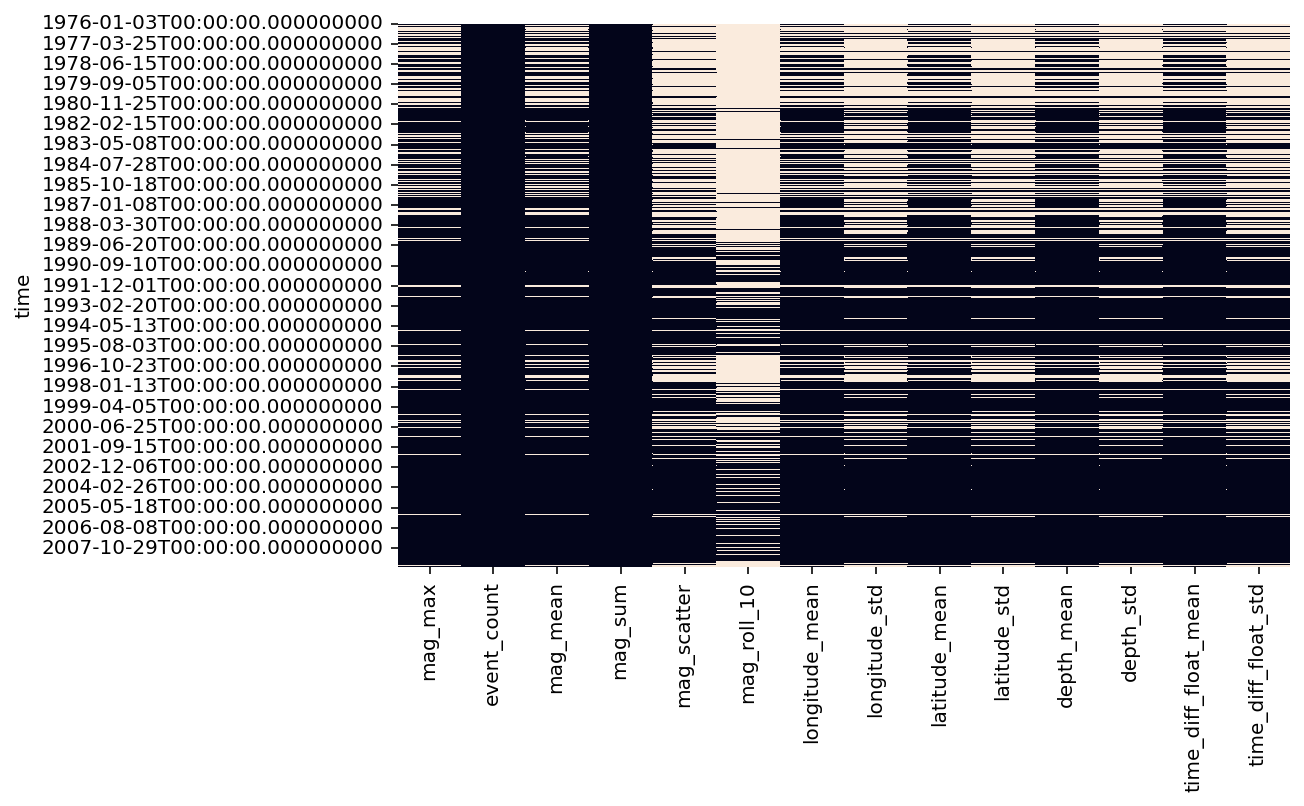

In [129]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_daily.isnull(), cbar=False)

In [130]:
df_daily_clean = df_daily[df_daily.index > "1972-01-01"]

df_daily_clean.drop(columns = ["mag_roll_10"], inplace = True)

df_daily_clean

mag_max  event_count  mag_mean  mag_sum  mag_scatter  \
time                                                               
1976-01-03      4.2            3       3.8     11.5          0.3   
1976-01-04      NaN            0       NaN      0.0          NaN   
1976-01-05      NaN            0       NaN      0.0          NaN   
1976-01-06      3.6            1       3.6      3.6          NaN   
1976-01-07      NaN            0       NaN      0.0          NaN   
...             ...          ...       ...      ...          ...   
2008-12-24      4.4            7       3.8     26.9          0.3   
2008-12-25      3.7            9       3.1     28.2          0.3   
2008-12-26      2.9            1       2.9      2.9          NaN   
2008-12-27      4.4            5       4.0     19.8          0.5   
2008-12-28      5.2            5       4.1     20.3          0.8   

            longitude_mean  longitude_std  latitude_mean  latitude_std  \
time                                                                     
1976-01-03            21.8            0.3           38.5           0.2   
1976-01-04             NaN            NaN            NaN           NaN   
1976-01-05             NaN            NaN            NaN           NaN   
1976-01-06            21.8            NaN           38.4           NaN   
1976-01-07             NaN            NaN            NaN           NaN   
...                    ...            ...            ...           ...   
2008-12-24            28.1            2.8           37.6           0.6   
2008-12-25            30.0            2.1           37.7           0.8   
2008-12-26            40.2            NaN           39.2           NaN   
2008-12-27            26.0            2.9           38.2           2.1   
2008-12-28            25.7            3.0           37.5           1.8   

            depth_mean  depth_std  time_diff_float_mean  time_diff_float_std  
time                                                                          
1976-01-03        49.3        9.3                9230.7              10018.3  
1976-01-04         NaN        NaN                   NaN                  NaN  
1976-01-05         NaN        NaN                   NaN                  NaN  
1976-01-06        33.0        NaN              249967.0                  NaN  
1976-01-07         NaN        NaN                   NaN                  NaN  
...                ...        ...                   ...                  ...  
2008-12-24         7.7        6.3               18051.7              21725.7  
2008-12-25        10.4       12.3                9540.1              16642.9  
2008-12-26         8.6        NaN               80286.0                  NaN  
2008-12-27        13.8       11.5               17808.8              16682.9  
2008-12-28        30.7       29.2               17359.0               9093.2  

[12049 rows x 13 columns]

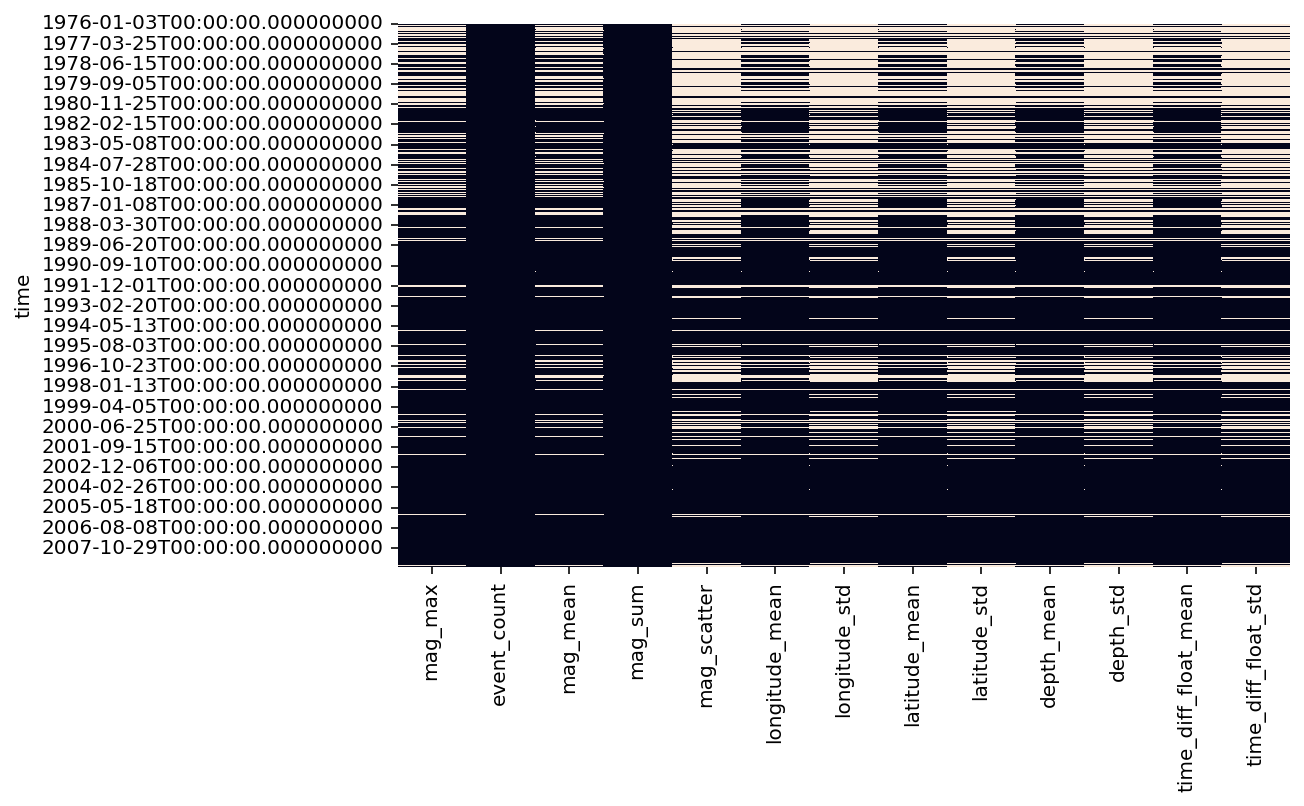

In [131]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_daily_clean.isnull(), cbar=False)

In [132]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               9604 non-null   float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              9604 non-null   float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           7600 non-null   float64
 5   longitude_mean        9604 non-null   float64
 6   longitude_std         7600 non-null   float64
 7   latitude_mean         9604 non-null   float64
 8   latitude_std          7600 non-null   float64
 9   depth_mean            9604 non-null   float64
 10  depth_std             7600 non-null   float64
 11  time_diff_float_mean  9604 non-null   float64
 12  time_diff_float_std   7600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [133]:
#Source: https://medium.com/@drnesr/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
df_daily_clean.interpolate('time', inplace = True)
df_daily_clean

mag_max  event_count  mag_mean  mag_sum  mag_scatter  \
time                                                               
1976-01-03      4.2            3       3.8     11.5          0.3   
1976-01-04      4.0            0       3.8      0.0          0.3   
1976-01-05      3.8            0       3.7      0.0          0.4   
1976-01-06      3.6            1       3.6      3.6          0.4   
1976-01-07      3.8            0       3.7      0.0          0.4   
...             ...          ...       ...      ...          ...   
2008-12-24      4.4            7       3.8     26.9          0.3   
2008-12-25      3.7            9       3.1     28.2          0.3   
2008-12-26      2.9            1       2.9      2.9          0.4   
2008-12-27      4.4            5       4.0     19.8          0.5   
2008-12-28      5.2            5       4.1     20.3          0.8   

            longitude_mean  longitude_std  latitude_mean  latitude_std  \
time                                                                     
1976-01-03            21.8            0.3           38.5           0.2   
1976-01-04            21.8            0.9           38.5           0.3   
1976-01-05            21.8            1.4           38.5           0.4   
1976-01-06            21.8            2.0           38.4           0.5   
1976-01-07            22.6            2.5           38.2           0.7   
...                    ...            ...            ...           ...   
2008-12-24            28.1            2.8           37.6           0.6   
2008-12-25            30.0            2.1           37.7           0.8   
2008-12-26            40.2            2.5           39.2           1.5   
2008-12-27            26.0            2.9           38.2           2.1   
2008-12-28            25.7            3.0           37.5           1.8   

            depth_mean  depth_std  time_diff_float_mean  time_diff_float_std  
time                                                                          
1976-01-03        49.3        9.3                9230.7              10018.3  
1976-01-04        43.9       10.9               89476.1              33506.5  
1976-01-05        38.4       12.5              169721.6              56994.6  
1976-01-06        33.0       14.1              249967.0              80482.8  
1976-01-07        35.9       15.7              231335.9             103971.0  
...                ...        ...                   ...                  ...  
2008-12-24         7.7        6.3               18051.7              21725.7  
2008-12-25        10.4       12.3                9540.1              16642.9  
2008-12-26         8.6       11.9               80286.0              16662.9  
2008-12-27        13.8       11.5               17808.8              16682.9  
2008-12-28        30.7       29.2               17359.0               9093.2  

[12049 rows x 13 columns]

In [134]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               12049 non-null  float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              12049 non-null  float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           12049 non-null  float64
 5   longitude_mean        12049 non-null  float64
 6   longitude_std         12049 non-null  float64
 7   latitude_mean         12049 non-null  float64
 8   latitude_std          12049 non-null  float64
 9   depth_mean            12049 non-null  float64
 10  depth_std             12049 non-null  float64
 11  time_diff_float_mean  12049 non-null  float64
 12  time_diff_float_std   12049 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [135]:
NaN_featuresx = [feature for feature in df_daily_clean.columns if ((df_daily_clean[feature].dtypes != 'O') & (df_daily_clean[feature].count() < df_daily_clean.shape[0]))]
NaN_featuresx

[]

In [136]:
df_eq = df_daily_clean
df_eq.shape

(12049, 13)

In [137]:
## Large earthquakes labeling:
label = []
cnt = 0
for i, mag in enumerate(df_eq["mag_max"]):
    if (mag>5.5):
        cnt = cnt + 1
        label.append(int(cnt))
    else:
        label.append(0)

df_eq["large_eq_label"] = label

In [138]:
df_eq.describe().T

count    mean      std   min     25%     50%     75%  \
mag_max              12049.0     4.0      0.6   1.2     3.6     4.0     4.4   
event_count          12049.0     4.5      5.7   0.0     1.0     3.0     6.0   
mag_mean             12049.0     3.5      0.6   1.2     3.2     3.5     3.9   
mag_sum              12049.0    15.0     18.7   0.0     3.4     9.3    21.1   
mag_scatter          12049.0     0.5      0.3   0.0     0.3     0.4     0.6   
...                      ...     ...      ...   ...     ...     ...     ...   
depth_mean           12049.0    21.2     16.2   0.0    10.0    16.5    26.3   
depth_std            12049.0    11.7     12.4   0.0     2.9     9.6    15.0   
time_diff_float_mean 12049.0 74387.8 107313.6 874.5 12831.6 31053.0 92057.0   
time_diff_float_std  12049.0 45080.9  57304.4  33.9 11270.3 23784.6 56499.2   
large_eq_label       12049.0     1.0     10.3   0.0     0.0     0.0     0.0   

                           max  
mag_max                    7.6  
event_count              101.0  
mag_mean                   5.9  
mag_sum                  347.3  
mag_scatter                2.2  
...                        ...  
depth_mean               203.9  
depth_std                112.4  
time_diff_float_mean 1077933.0  
time_diff_float_std   646478.7  
large_eq_label           157.0  

[14 rows x 8 columns]

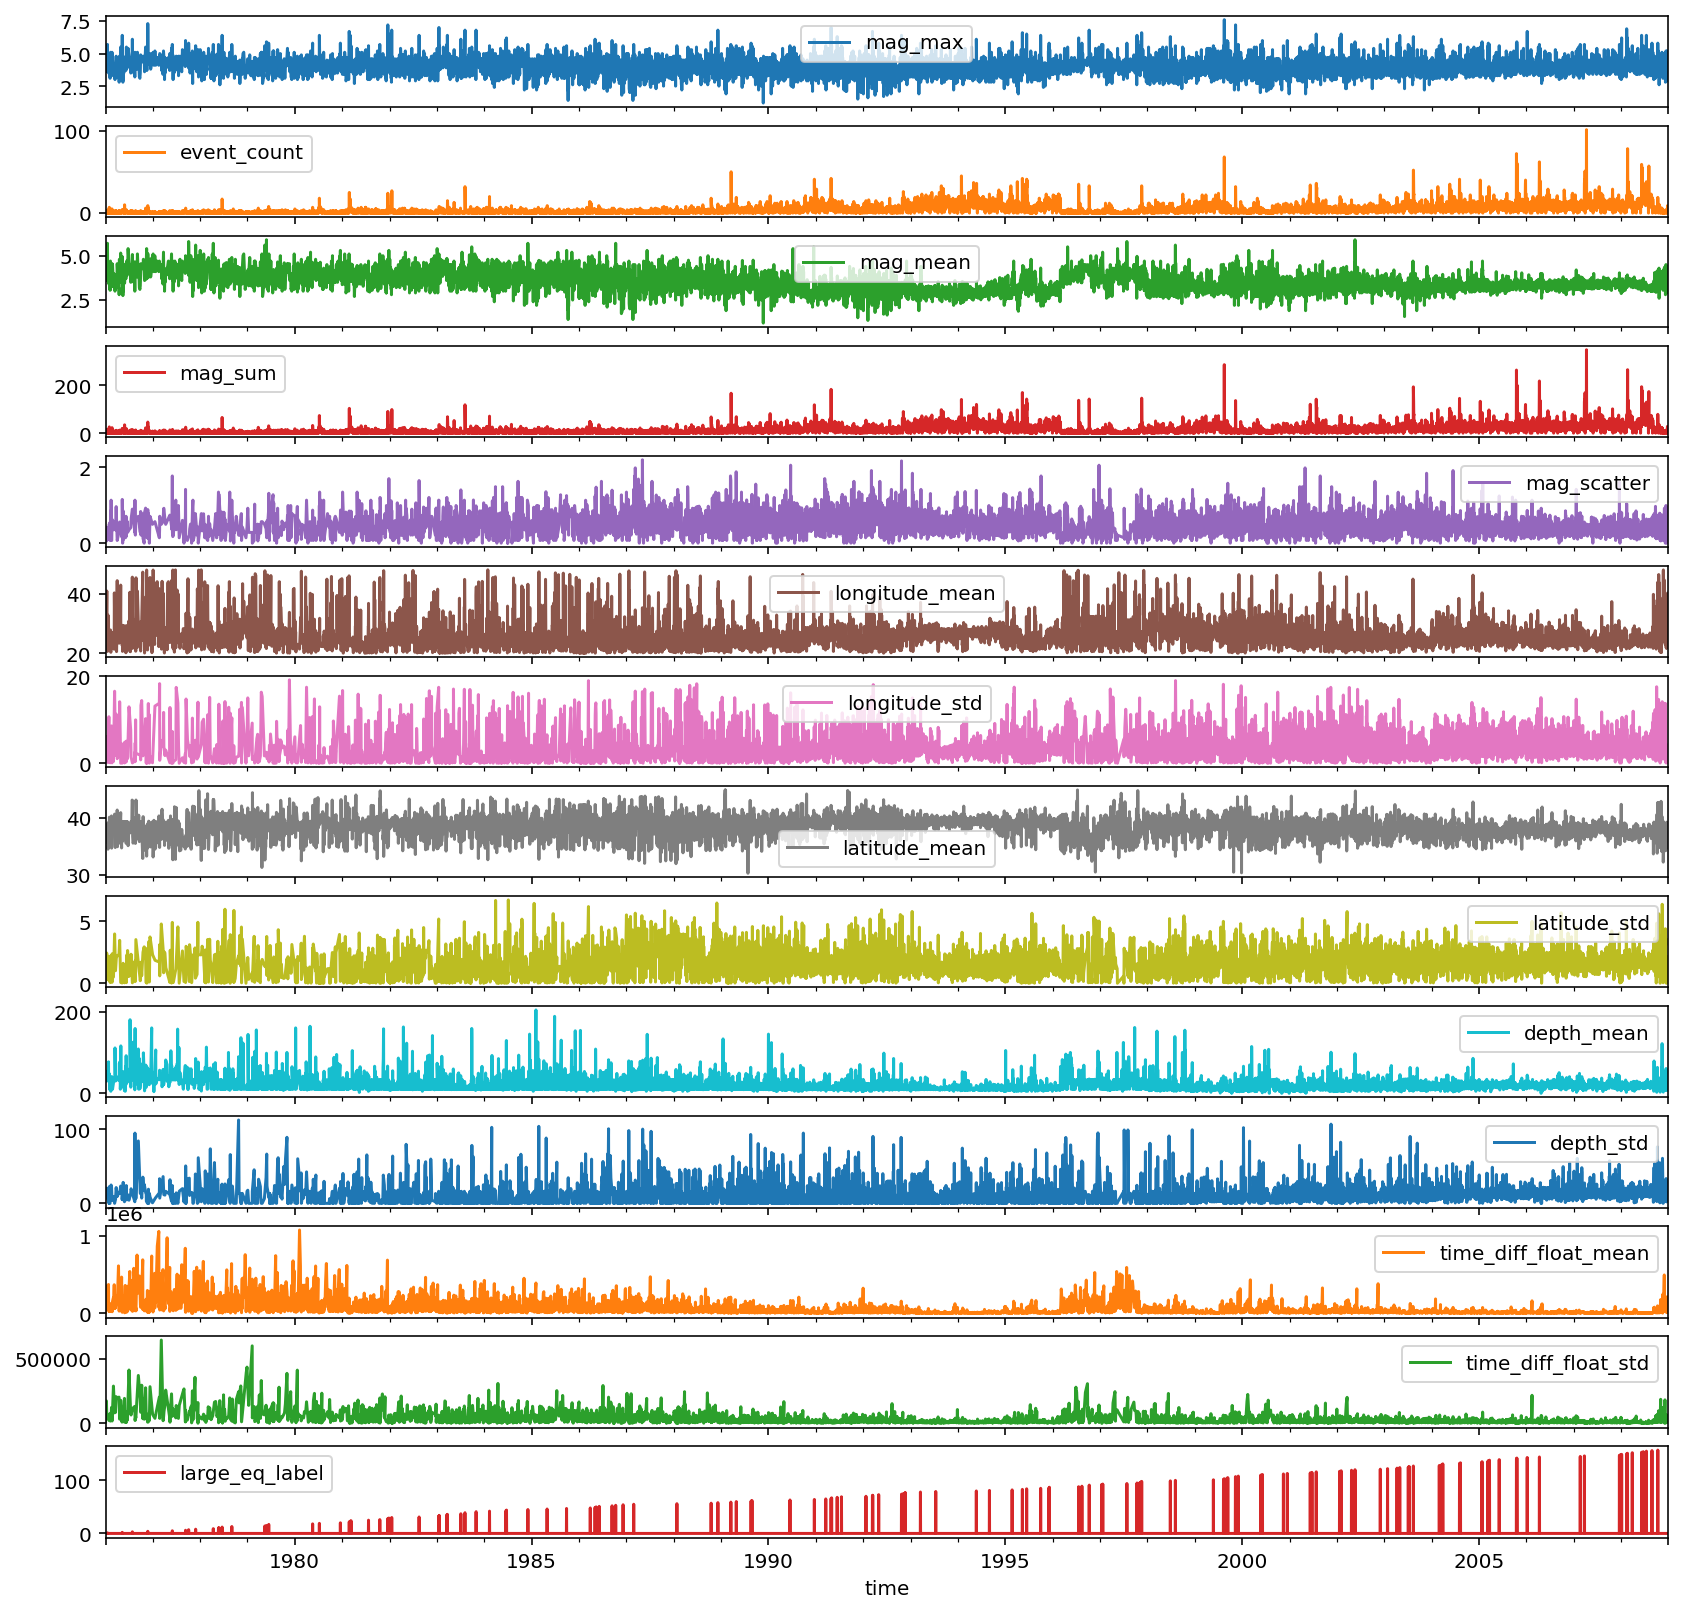

In [139]:
df_eq.plot(subplots=True,figsize=(14,14));

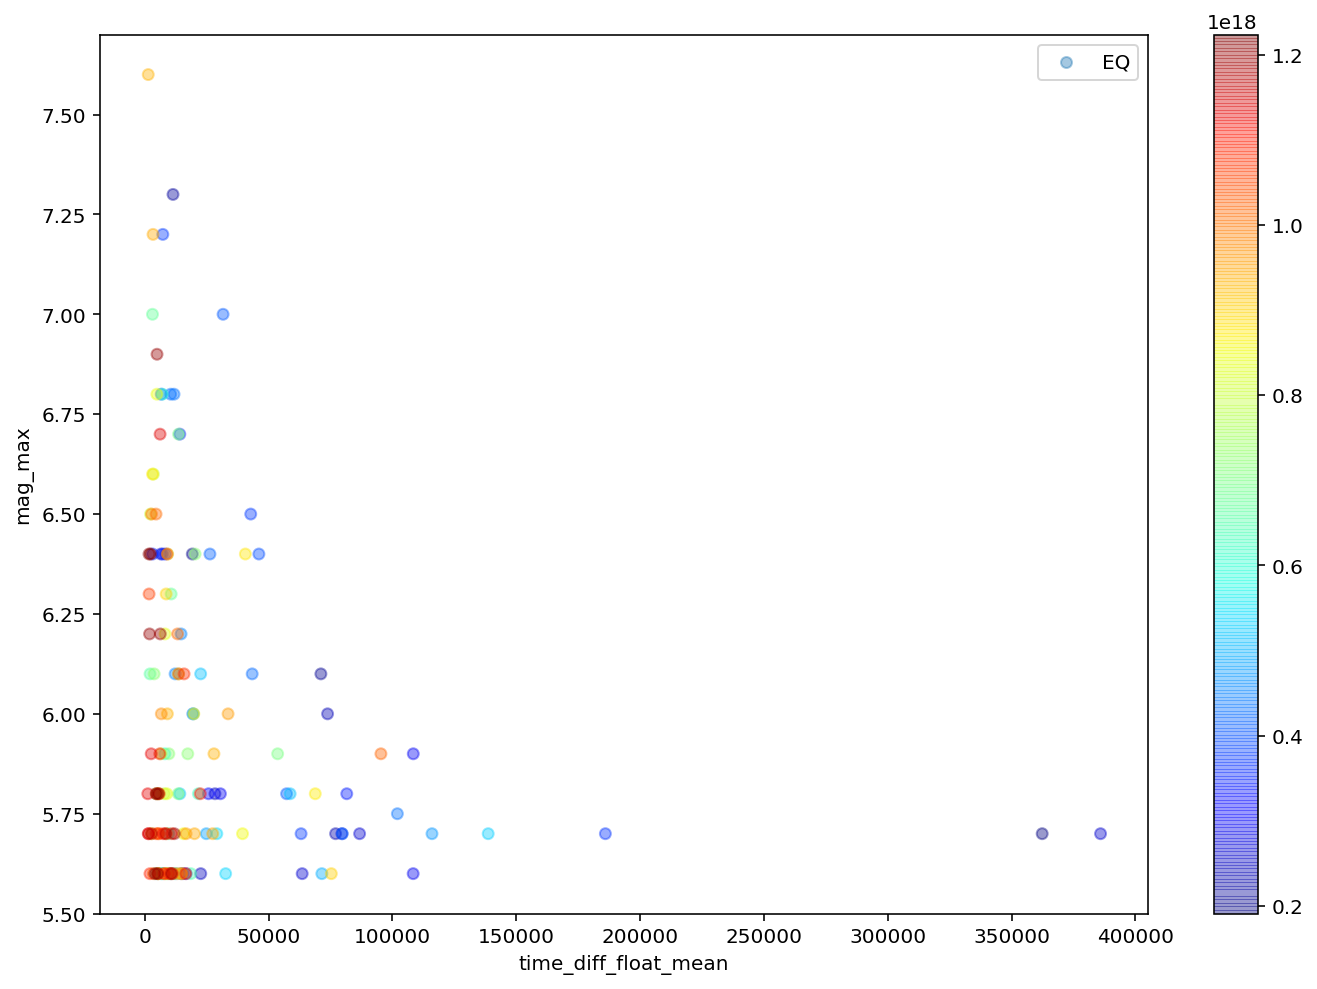

In [140]:
large_eq = df_eq[df_eq["large_eq_label"]>0]

ax = plt.gca()


large_eq.plot(kind="scatter", x="time_diff_float_mean", y="mag_max",
    s=30, label="EQ",
    c=large_eq.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.tight_layout()

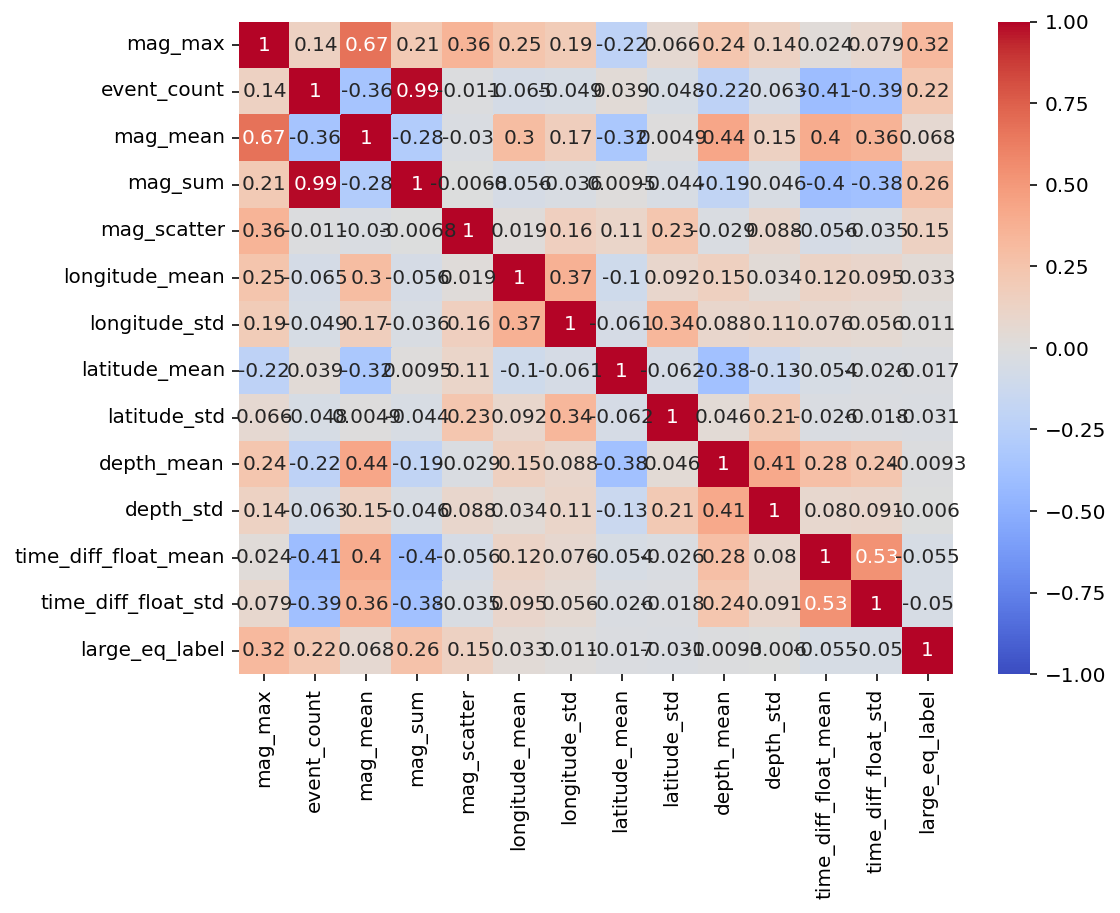

In [141]:
df_corr = df_eq.corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,
        vmin=-1,
        cmap='coolwarm',
        annot=True);
# plt.savefig("../plots/Loma_prieta_EDA_corr_plots.png")

In [142]:
df_eq.head(1)

mag_max  event_count  mag_mean  mag_sum  mag_scatter  \
time                                                               
1976-01-03      4.2            3       3.8     11.5          0.3   

            longitude_mean  longitude_std  latitude_mean  latitude_std  \
time                                                                     
1976-01-03            21.8            0.3           38.5           0.2   

            depth_mean  depth_std  time_diff_float_mean  time_diff_float_std  \
time                                                                           
1976-01-03        49.3        9.3                9230.7              10018.3   

            large_eq_label  
time                        
1976-01-03               0

Text(0, 0.5, 'Latitude')

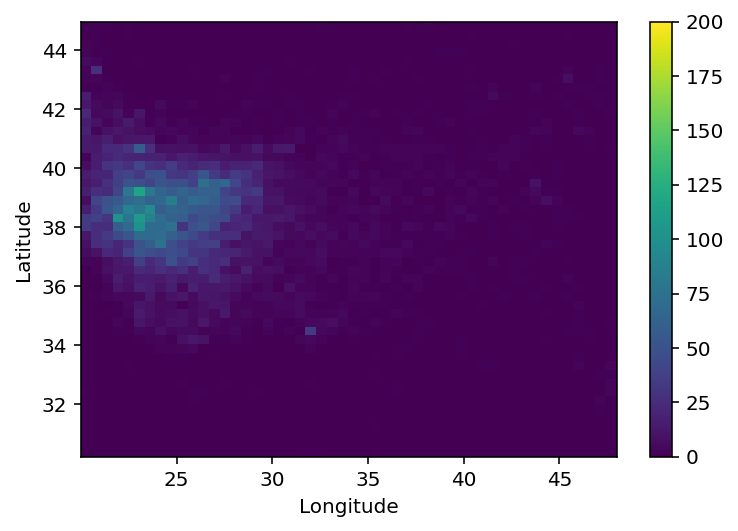

In [143]:
df_eq_plot = df_eq[df_eq["depth_mean"]<50]

plt.hist2d(df_eq_plot['longitude_mean'], df_eq_plot['latitude_mean'], bins=(50, 50), vmax=200)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Depth (km)')

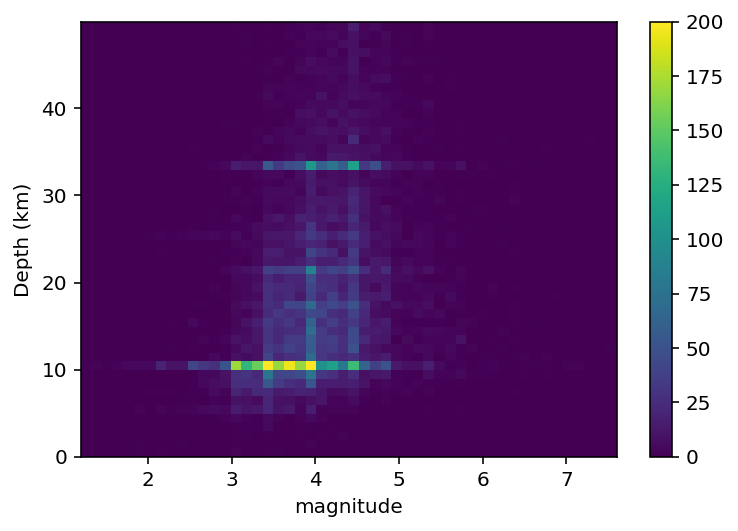

In [144]:
df_eq_plot = df_eq[df_eq["depth_mean"]<50]
plt.hist2d(df_eq_plot['mag_max'], df_eq_plot['depth_mean'], bins=(50, 50), vmax=200)
plt.colorbar()
plt.xlabel('magnitude')
plt.ylabel('Depth (km)')

In [145]:
df_eq["time_diff_float_mean"].describe()

count     12049.0
mean      74387.8
std      107313.6
min         874.5
25%       12831.6
50%       31053.0
75%       92057.0
max     1077933.0
Name: time_diff_float_mean, dtype: float64

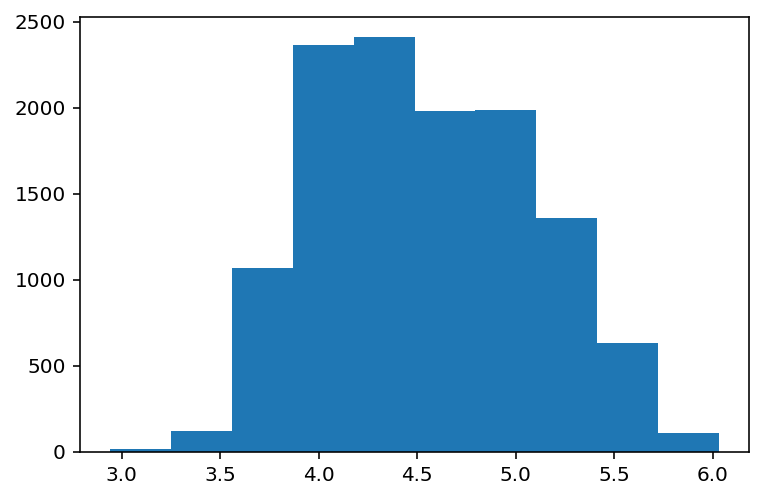

In [146]:
plt.hist(np.log10(df_eq["time_diff_float_mean"]));

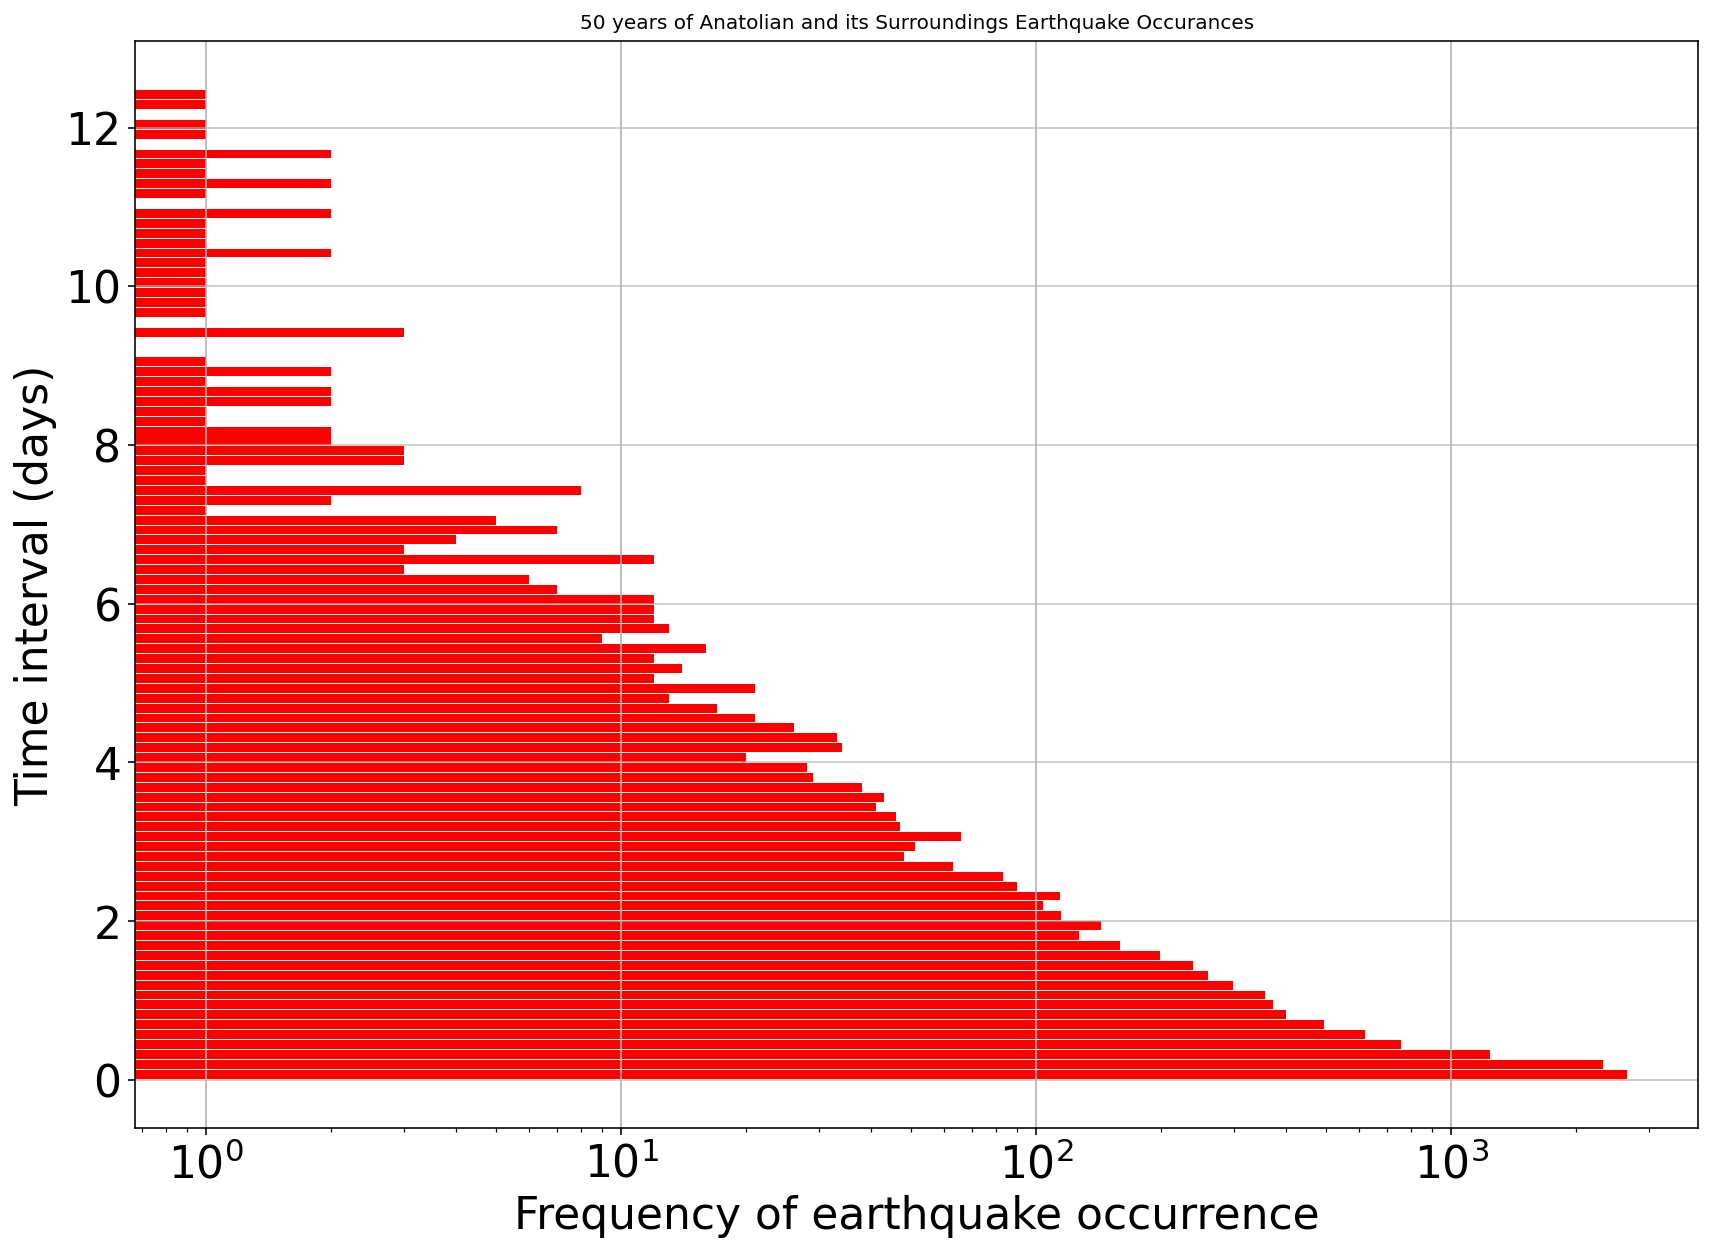

In [147]:
df_eq_plot = df_eq.copy()
df_eq_plot["time_days"] = (np.array(df_eq_plot["time_diff_float_mean"])/86_400)


%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (14, 10));


df_eq_plot["time_days"].plot.hist(grid=True, bins=100, rwidth=0.9,orientation="horizontal",
                   color='red')

plt.title('50 years of Anatolian and its Surroundings Earthquake Occurances',fontsize = 10)
plt.ylabel('Time interval (days)',fontsize = 22)
plt.xlabel('Frequency of earthquake occurrence',fontsize = 22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

# plt.ylim(0, 6)
plt.grid(axis='y', alpha=0.75)

plt.xscale('log')


plt.savefig('/content/')

Splitting data

In [148]:
df_eq_model = df_eq.drop(columns = ["large_eq_label"])

train_size = int(len(df_eq_model)* 0.9)
test_size = len(df_eq_model) - train_size
train, test = df_eq_model.iloc[0:train_size], df_eq_model.iloc[train_size:len(df_eq_model)]

print(train.shape, test.shape)

(10844, 13) (1205, 13)


In [149]:
train.head(5)


mag_max  event_count  mag_mean  mag_sum  mag_scatter  \
time                                                               
1976-01-03      4.2            3       3.8     11.5          0.3   
1976-01-04      4.0            0       3.8      0.0          0.3   
1976-01-05      3.8            0       3.7      0.0          0.4   
1976-01-06      3.6            1       3.6      3.6          0.4   
1976-01-07      3.8            0       3.7      0.0          0.4   

            longitude_mean  longitude_std  latitude_mean  latitude_std  \
time                                                                     
1976-01-03            21.8            0.3           38.5           0.2   
1976-01-04            21.8            0.9           38.5           0.3   
1976-01-05            21.8            1.4           38.5           0.4   
1976-01-06            21.8            2.0           38.4           0.5   
1976-01-07            22.6            2.5           38.2           0.7   

            depth_mean  depth_std  time_diff_float_mean  time_diff_float_std  
time                                                                          
1976-01-03        49.3        9.3                9230.7              10018.3  
1976-01-04        43.9       10.9               89476.1              33506.5  
1976-01-05        38.4       12.5              169721.6              56994.6  
1976-01-06        33.0       14.1              249967.0              80482.8  
1976-01-07        35.9       15.7              231335.9             103971.0

In [150]:
f_columns = ['event_count', 'mag_mean', 'mag_sum', 'mag_scatter',
       'longitude_mean', 'longitude_std', 'latitude_mean', 'latitude_std',
       'depth_mean', 'depth_std', 'time_diff_float_mean',
       'time_diff_float_std']

f_transformer = RobustScaler()
mag_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
mag_transformer = mag_transformer.fit(train[["mag_max"]])

In [151]:
f_transformer.get_params()

{'copy': True,
 'quantile_range': (25.0, 75.0),
 'unit_variance': False,
 'with_centering': True,
 'with_scaling': True}

In [152]:
train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train["mag_max"] = mag_transformer.transform(train[["mag_max"]])

test.loc[:,f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test["mag_max"] = mag_transformer.transform(test[["mag_max"]])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-152-70270e94569e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["mag_max"] = mag_transformer.transform(train[["mag_max"]])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [153]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)- time_steps):
        v = X.iloc[i: (i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [154]:
TIME_STEPS = 120

X_train, y_train = create_dataset(train, train["mag_max"], time_steps = TIME_STEPS)

X_test, y_test = create_dataset(test, test["mag_max"], time_steps= TIME_STEPS)

In [155]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(10724, 120, 13) (10724,)
(1085, 120, 13) (1085,)


In [156]:
X_train[0][0]

array([ 0.25      ,  0.25      ,  0.4       ,  0.22972973, -0.41326515,
       -0.69755461, -0.7543504 , -0.0599921 , -1.00744485,  1.93399551,
        0.01810367, -0.33168352, -0.35529331])

In [157]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape = (X_train.shape[1], X_train.shape[2]),
                                   return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.LSTM(units=128,
                                   return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.Dropout(rate = 0.3))
model.add(keras.layers.LSTM(units=64,
                                   return_sequences = False))
model.add(keras.layers.Dropout(rate = 0.3))
model.add(keras.layers.Dense(units = 1))

In [158]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=32,
            input_shape = (X_train.shape[1], X_train.shape[2])
        )
    )
)
# Adding dropout layer to regularize complexities 
model.add(keras.layers.Dropout(rate = 0.7))

# Add output layer
model.add(keras.layers.Dense(units = 1))

In [159]:
# Compiling 
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [160]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.33, 
    shuffle = False 
)

Epoch 1/10
225/225 [==============================] - 23s 80ms/step - loss: 0.7090 - val_loss: 0.4954
Epoch 2/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5890 - val_loss: 0.4916
Epoch 3/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5533 - val_loss: 0.4910
Epoch 4/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5371 - val_loss: 0.4891
Epoch 5/10
225/225 [==============================] - 17s 77ms/step - loss: 0.5279 - val_loss: 0.4885
Epoch 6/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5188 - val_loss: 0.4870
Epoch 7/10
225/225 [==============================] - 19s 86ms/step - loss: 0.5146 - val_loss: 0.4878
Epoch 8/10
225/225 [==============================] - 17s 78ms/step - loss: 0.5127 - val_loss: 0.4879
Epoch 9/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5090 - val_loss: 0.4867
Epoch 10/10
225/225 [==============================] - 17s 77ms/step - loss: 0.503

In [161]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               11776     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


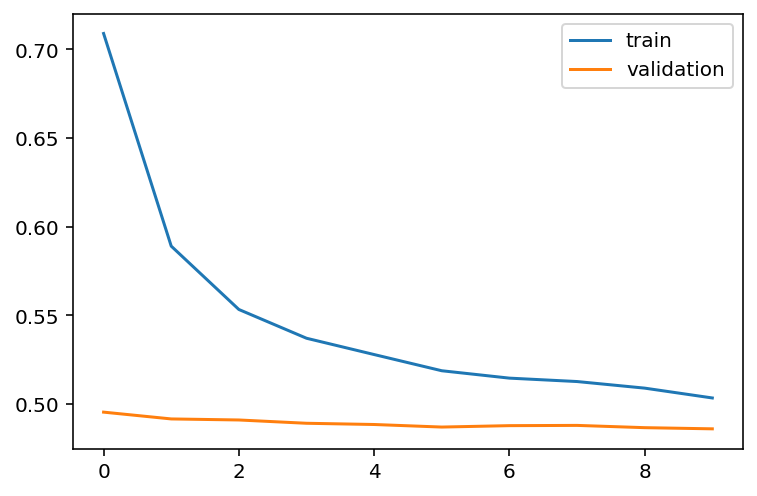

In [162]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "validation")
plt.legend()

In [163]:
y_pred = model.predict(X_test)


34/34 [==============================] - 1s 18ms/step


In [164]:
y_train_inv = mag_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = mag_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = mag_transformer.inverse_transform(y_pred)


In [256]:
y_test_inv[0]

array([3.7, 3.7, 4.1, ..., 2.9, 4.4, 5.2])

In [258]:
y_pred_inv[:,0]

array([4.0853095, 3.9788337, 3.9105422, ..., 3.952646 , 3.8151486,
       3.9304674], dtype=float32)

In [186]:
trainScore = np.sqrt(mean_squared_error(y_test_inv[0], y_pred_inv[:,0]))
print('Test Score: %.2f RMSE' % (trainScore))

Test Score: 0.51 RMSE


In [166]:
from sklearn.metrics import mean_absolute_error

In [217]:
y_pred_inv

array([[4.0853095],
       [3.9788337],
       [3.9105422],
       ...,
       [3.952646 ],
       [3.8151486],
       [3.9304674]], dtype=float32)

In [238]:
y_test_inv_cv = y_test_inv.astype(np.float32)

In [250]:
len(y_pred_inv)

1085

In [223]:
y_test_inv_cv

array([[3.7, 3.7, 4.1, ..., 2.9, 4.4, 5.2]], dtype=float32)

In [249]:
len(y_test_inv_cv)

1085

In [248]:
y_test_inv_cv = np.reshape(y_test_inv_cv, (-1, 1))

In [236]:
y_test_inv_cv

array([[3.7, 3.7, 4.1, ..., 2.9, 4.4, 5.2]], dtype=float32)

In [265]:
print('R2 Score: ', r2_score(y_test_inv[0], y_pred_inv[:,0]))
print('MAE: ', mean_absolute_error(y_test_inv_cv, y_pred_inv))
print('MSE: ', np.square(np.subtract(y_test_inv_cv,y_pred_inv)).mean())
print('RMSE: %.4f' % (trainScore))

R2 Score:  -0.026930651816445605
MAE:  0.37323537
MSE:  0.2626174
RMSE: 0.5125


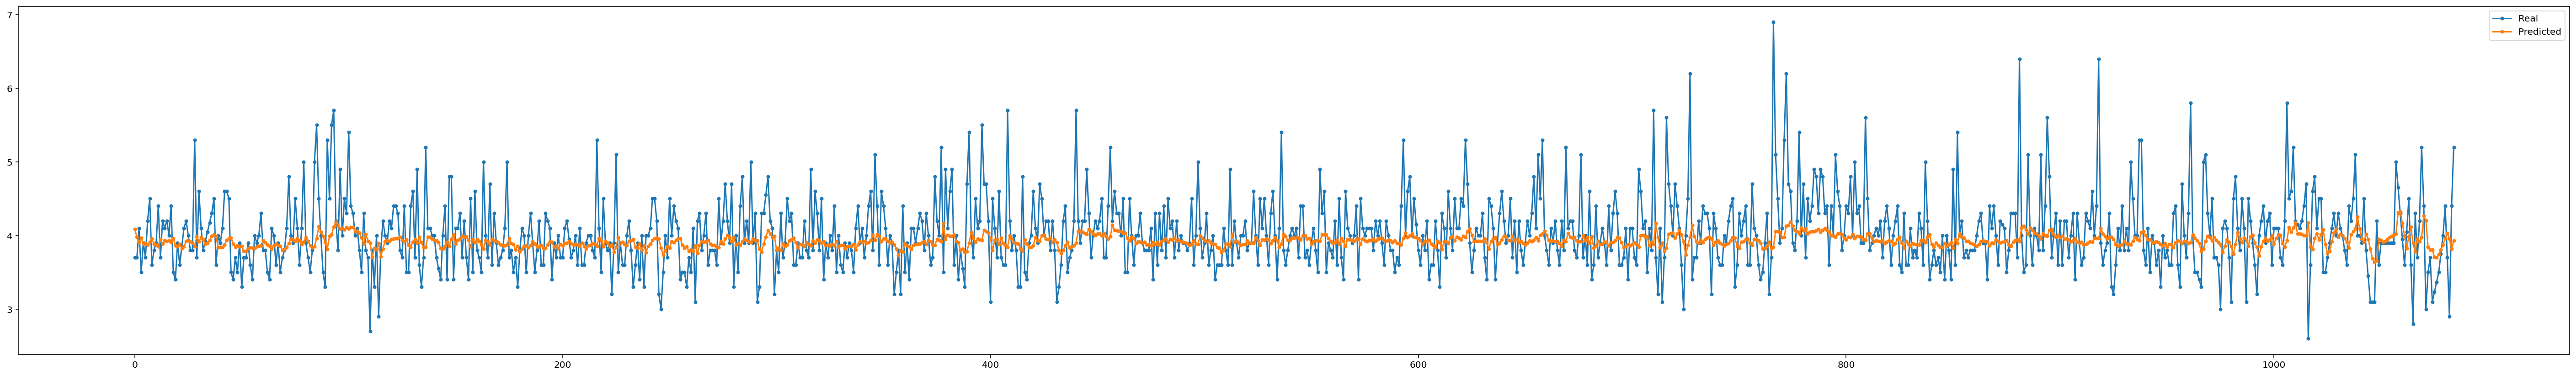

In [198]:
plt.figure(figsize = (50,7))
plt.plot(y_test_inv.flatten(), marker = '.', label = "Real")
plt.plot(y_pred_inv.flatten(), marker = '.', label = "Predicted")
plt.legend()

### After this part i tried to create another model to predict magnitude from latitude, longtitude and depth. In this part google Representation with a Feature Cross programming is used. The instructions there have been followed. 


In [169]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')


In [170]:

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_eq_2, test_size=0.15, random_state=25)


In [171]:
train_df

mag  longitude  latitude  depth
42780  3.3       26.7      38.1   35.0
47474  3.1       24.0      38.6   32.0
54344  3.3       26.2      35.5   32.0
31895  2.8       27.8      39.3   10.0
43357  3.3       20.9      37.6    9.0
...    ...        ...       ...    ...
35702  3.1       20.4      39.9   28.0
26767  2.8       28.2      41.3   10.0
6618   3.5       27.2      35.3   10.0
24894  4.3       21.5      38.9   33.0
29828  4.0       21.4      36.9   33.0

[46737 rows x 4 columns]

In [172]:
# Load the dataset

# Scale the labels
scale_factor = 10.0
# Scale the training set's label.
#train_df["mag"] /= scale_factor 

# Scale the test set's label
#test_df["mag"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [173]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [174]:
train_df

mag  longitude  latitude  depth
2950   3.5       20.3      38.3   10.0
37523  3.2       22.9      36.5   46.0
39331  3.3       27.9      36.9   17.0
35353  2.0       22.5      40.0    3.0
48156  3.2       20.5      38.4    5.0
...    ...        ...       ...    ...
15565  2.7       27.6      39.1   10.0
16603  3.5       29.0      36.6   10.0
32671  3.7       26.8      36.6    5.0
11698  2.1       23.9      39.0   10.0
47594  4.0       25.8      33.9   13.0

[46737 rows x 4 columns]

In [175]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


In [176]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46737 entries, 2950 to 47594
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag        46737 non-null  float64
 1   longitude  46737 non-null  float64
 2   latitude   46737 non-null  float64
 3   depth      46737 non-null  float64
dtypes: float64(4)
memory usage: 1.8 MB


In [177]:
map(float, df_eq_2)

In [178]:
df_eq_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54985 entries, 0 to 54984
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag        54985 non-null  float64
 1   longitude  54985 non-null  float64
 2   latitude   54985 non-null  float64
 3   depth      54985 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


## Train the model with bucket representations

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


468/468 [==============================] - 1s 1ms/step - loss: 18.0785 - root_mean_squared_error: 4.2519
Epoch 2/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0666 - root_mean_squared_error: 1.7512
Epoch 3/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0626 - root_mean_squared_error: 1.7500
Epoch 4/30
468/468 [==============================] - 1s 1ms/step - loss: 3.0404 - root_mean_squared_error: 1.7437
Epoch 5/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0596 - root_mean_squared_error: 1.7492
Epoch 6/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0389 - root_mean_squared_error: 1.7432
Epoch 7/30
468/468 [==============================] - 1s 1ms/step - loss: 3.0471 - root_mean_squared_error: 1.7456
Epoch 8/30
468/468 [==============================] - 1s 1ms/step - loss: 3.0371 - root_mean_squared_error: 1.7427
Epoch 9/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0495 - root_me

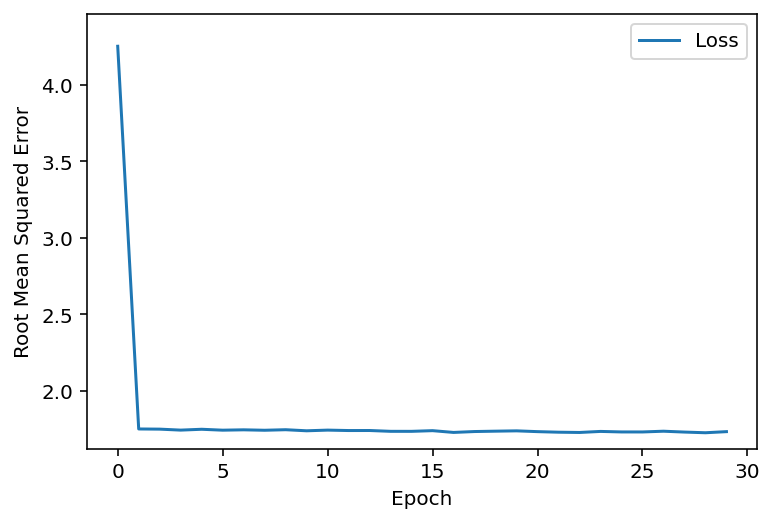


: Evaluate the new model against the test set:
83/83 [==============================] - 0s 1ms/step - loss: 3.3566 - root_mean_squared_error: 1.8321


[3.3566439151763916, 1.832114577293396]

In [179]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'mag'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [180]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


468/468 [==============================] - 1s 2ms/step - loss: 0.6273 - root_mean_squared_error: 0.7920
Epoch 2/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3269 - root_mean_squared_error: 0.5718
Epoch 3/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3260 - root_mean_squared_error: 0.5709
Epoch 4/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3261 - root_mean_squared_error: 0.5711
Epoch 5/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3264 - root_mean_squared_error: 0.5713
Epoch 6/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3266 - root_mean_squared_error: 0.5715
Epoch 7/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3263 - root_mean_squared_error: 0.5713
Epoch 8/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714
Epoch 9/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3260 - root_mea

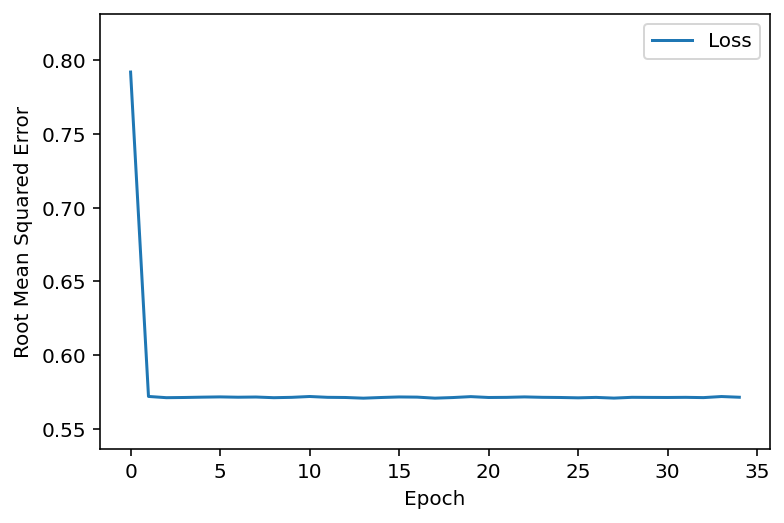


: Evaluate the new model against the test set:
83/83 [==============================] - 0s 2ms/step - loss: 0.3319 - root_mean_squared_error: 0.5761


[0.3319176137447357, 0.5761229395866394]

In [181]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [182]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


468/468 [==============================] - 1s 2ms/step - loss: 0.6376 - root_mean_squared_error: 0.7985
Epoch 2/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3262 - root_mean_squared_error: 0.5711
Epoch 3/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3264 - root_mean_squared_error: 0.5713
Epoch 4/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3258 - root_mean_squared_error: 0.5708
Epoch 5/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3263 - root_mean_squared_error: 0.5713
Epoch 6/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3267 - root_mean_squared_error: 0.5716
Epoch 7/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3262 - root_mean_squared_error: 0.5711
Epoch 8/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714
Epoch 9/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3266 - root_mea

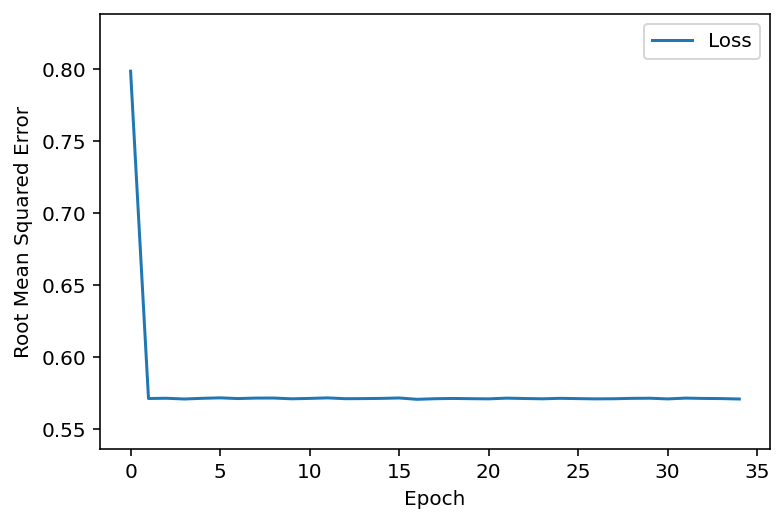


: Evaluate the new model against the test set:
83/83 [==============================] - 0s 2ms/step - loss: 0.3345 - root_mean_squared_error: 0.5784


[0.33451324701309204, 0.5783712267875671]

In [183]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)